# RL.py

In [22]:
import numpy as np
from MDP import MDP
import matplotlib.pyplot as plt

class RL:
    def __init__(self,mdp,sampleReward):
        '''Constructor for the RL class

        Inputs:
        mdp -- Markov decision process (T, R, discount)
        sampleReward -- Function to sample rewards (e.g., bernoulli, Gaussian).
        This function takes one argument: the mean of the distributon and 
        returns a sample from the distribution.
        '''

        self.mdp = mdp
        self.sampleReward = sampleReward

    def sampleRewardAndNextState(self,state,action):
        '''Procedure to sample a reward and the next state
        reward ~ Pr(r)
        nextState ~ Pr(s'|s,a)

        Inputs:
        state -- current state
        action -- action to be executed

        Outputs: 
        reward -- sampled reward
        nextState -- sampled next state
        '''

        reward = self.sampleReward(self.mdp.R[action,state])
        cumProb = np.cumsum(self.mdp.T[action,state,:])
        nextState = np.where(cumProb >= np.random.rand(1))[0][0]
        return [reward,nextState]

    def qLearning(self,s0,initialQ,nEpisodes,nSteps,epsilon=0,temperature=0):
        '''qLearning algorithm.  Epsilon exploration and Boltzmann exploration
        are combined in one procedure by sampling a random action with 
        probabilty epsilon and performing Boltzmann exploration otherwise.  
        When epsilon and temperature are set to 0, there is no exploration.

        Inputs:
        s0 -- initial state
        initialQ -- initial Q function (|A|x|S| array)
        nEpisodes -- # of episodes (one episode consists of a trajectory of nSteps that starts in s0
        nSteps -- # of steps per episode
        epsilon -- probability with which an action is chosen at random
        temperature -- parameter that regulates Boltzmann exploration

        Outputs: 
        Q -- final Q function (|A|x|S| array)
        policy -- final policy
        '''
        trial = 100
        avg_cul_rewards = np.zeros(nEpisodes)

        alpha = 0.1 # learning rate

        for i in range(trial):
            Q = initialQ.copy()
            policy = np.zeros(self.mdp.nStates,int)
            cumulative_rewards = np.zeros(nEpisodes)

            for episode in range(nEpisodes):
                currentState = s0
                for j in range(nSteps):
                    act = np.argmax(Q[:, currentState])
                    # Epsilon exploration
                    if(epsilon > 0):
                        if(np.random.rand() <= epsilon):
                            act = np.random.randint(self.mdp.nActions)
                    # Boltzmann exploration
                    else:
                        if(temperature > 0):
                            all_act = Q[:, currentState]/temperature
                            boltz_prob = (np.exp(all_act) / np.sum(np.exp(all_act)))
                            act = np.random.choice(np.arange(self.mdp.nActions), p=boltz_prob)
                    # 執行action
                    reward, nextState = self.sampleRewardAndNextState(currentState, act)
                    # 更新Q-table
                    Q[act, currentState] = Q[act, currentState] + alpha * (reward + (self.mdp.discount * np.max(Q[:, nextState])) - Q[act, currentState])
                    policy[currentState] = act
                    currentState = nextState
                    # 累加discounted reward
                    cumulative_rewards[episode] += (np.power(self.mdp.discount, j) * reward)
            avg_cul_rewards += cumulative_rewards
        avg_cul_rewards = avg_cul_rewards / trial

        xAxis = range(1, (len(avg_cul_rewards)+1))
        yAxis = avg_cul_rewards
        pltLabel = "Epsilon : " + str(epsilon)
        plt.plot(xAxis, yAxis, label= pltLabel)

        return [Q,policy]    

# TestRLmaze.py

In [23]:
''' Construct a simple maze MDP

  Grid world layout:

  ---------------------
  |  0 |  1 |  2 |  3 |
  ---------------------
  |  4 |  5 |  6 |  7 |
  ---------------------
  |  8 |  9 | 10 | 11 |
  ---------------------
  | 12 | 13 | 14 | 15 |
  ---------------------

  Goal state: 14 
  Bad state: 9
  End state: 16

  The end state is an absorbing state that the agent transitions 
  to after visiting the goal state.

  There are 17 states in total (including the end state) 
  and 4 actions (up, down, left, right).'''

# Transition function: |A| x |S| x |S'| array
T = np.zeros([4,17,17])
a = 0.8;  # intended move
b = 0.1;  # lateral move

# up (a = 0)

T[0,0,0] = a+b;
T[0,0,1] = b;

T[0,1,0] = b;
T[0,1,1] = a;
T[0,1,2] = b;

T[0,2,1] = b;
T[0,2,2] = a;
T[0,2,3] = b;

T[0,3,2] = b;
T[0,3,3] = a+b;

T[0,4,4] = b;
T[0,4,0] = a;
T[0,4,5] = b;

T[0,5,4] = b;
T[0,5,1] = a;
T[0,5,6] = b;

T[0,6,5] = b;
T[0,6,2] = a;
T[0,6,7] = b;

T[0,7,6] = b;
T[0,7,3] = a;
T[0,7,7] = b;

T[0,8,8] = b;
T[0,8,4] = a;
T[0,8,9] = b;

T[0,9,8] = b;
T[0,9,5] = a;
T[0,9,10] = b;

T[0,10,9] = b;
T[0,10,6] = a;
T[0,10,11] = b;

T[0,11,10] = b;
T[0,11,7] = a;
T[0,11,11] = b;

T[0,12,12] = b;
T[0,12,8] = a;
T[0,12,13] = b;

T[0,13,12] = b;
T[0,13,9] = a;
T[0,13,14] = b;

T[0,14,16] = 1;

T[0,15,11] = a;
T[0,15,14] = b;
T[0,15,15] = b;

T[0,16,16] = 1;

# down (a = 1)

T[1,0,0] = b;
T[1,0,4] = a;
T[1,0,1] = b;

T[1,1,0] = b;
T[1,1,5] = a;
T[1,1,2] = b;

T[1,2,1] = b;
T[1,2,6] = a;
T[1,2,3] = b;

T[1,3,2] = b;
T[1,3,7] = a;
T[1,3,3] = b;

T[1,4,4] = b;
T[1,4,8] = a;
T[1,4,5] = b;

T[1,5,4] = b;
T[1,5,9] = a;
T[1,5,6] = b;

T[1,6,5] = b;
T[1,6,10] = a;
T[1,6,7] = b;

T[1,7,6] = b;
T[1,7,11] = a;
T[1,7,7] = b;

T[1,8,8] = b;
T[1,8,12] = a;
T[1,8,9] = b;

T[1,9,8] = b;
T[1,9,13] = a;
T[1,9,10] = b;

T[1,10,9] = b;
T[1,10,14] = a;
T[1,10,11] = b;

T[1,11,10] = b;
T[1,11,15] = a;
T[1,11,11] = b;

T[1,12,12] = a+b;
T[1,12,13] = b;

T[1,13,12] = b;
T[1,13,13] = a;
T[1,13,14] = b;

T[1,14,16] = 1;

T[1,15,14] = b;
T[1,15,15] = a+b;

T[1,16,16] = 1;

# left (a = 2)

T[2,0,0] = a+b;
T[2,0,4] = b;

T[2,1,1] = b;
T[2,1,0] = a;
T[2,1,5] = b;

T[2,2,2] = b;
T[2,2,1] = a;
T[2,2,6] = b;

T[2,3,3] = b;
T[2,3,2] = a;
T[2,3,7] = b;

T[2,4,0] = b;
T[2,4,4] = a;
T[2,4,8] = b;

T[2,5,1] = b;
T[2,5,4] = a;
T[2,5,9] = b;

T[2,6,2] = b;
T[2,6,5] = a;
T[2,6,10] = b;

T[2,7,3] = b;
T[2,7,6] = a;
T[2,7,11] = b;

T[2,8,4] = b;
T[2,8,8] = a;
T[2,8,12] = b;

T[2,9,5] = b;
T[2,9,8] = a;
T[2,9,13] = b;

T[2,10,6] = b;
T[2,10,9] = a;
T[2,10,14] = b;

T[2,11,7] = b;
T[2,11,10] = a;
T[2,11,15] = b;

T[2,12,8] = b;
T[2,12,12] = a+b;

T[2,13,9] = b;
T[2,13,12] = a;
T[2,13,13] = b;

T[2,14,16] = 1;

T[2,15,11] = a;
T[2,15,14] = b;
T[2,15,15] = b;

T[2,16,16] = 1;

# right (a = 3)

T[3,0,0] = b;
T[3,0,1] = a;
T[3,0,4] = b;

T[3,1,1] = b;
T[3,1,2] = a;
T[3,1,5] = b;

T[3,2,2] = b;
T[3,2,3] = a;
T[3,2,6] = b;

T[3,3,3] = a+b;
T[3,3,7] = b;

T[3,4,0] = b;
T[3,4,5] = a;
T[3,4,8] = b;

T[3,5,1] = b;
T[3,5,6] = a;
T[3,5,9] = b;

T[3,6,2] = b;
T[3,6,7] = a;
T[3,6,10] = b;

T[3,7,3] = b;
T[3,7,7] = a;
T[3,7,11] = b;

T[3,8,4] = b;
T[3,8,9] = a;
T[3,8,12] = b;

T[3,9,5] = b;
T[3,9,10] = a;
T[3,9,13] = b;

T[3,10,6] = b;
T[3,10,11] = a;
T[3,10,14] = b;

T[3,11,7] = b;
T[3,11,11] = a;
T[3,11,15] = b;

T[3,12,8] = b;
T[3,12,13] = a;
T[3,12,12] = b;

T[3,13,9] = b;
T[3,13,14] = a;
T[3,13,13] = b;

T[3,14,16] = 1;

T[3,15,11] = b;
T[3,15,15] = a+b;

T[3,16,16] = 1;

# Reward function: |A| x |S| array
R = -1 * np.ones([4,17]);

# set rewards
R[:,14] = 100;  # goal state
R[:,9] = -70;   # bad state
R[:,16] = 0;    # end state

# Discount factor: scalar in [0,1)
discount = 0.95
        
# MDP object
mdp = MDP(T,R,discount)

# RL problem
rlProblem = RL(mdp,np.random.normal)


Epsilon : 0.05
Q : [[ 8.54335084e+00  2.91189874e+00 -8.69686322e-02 -4.35988985e-01
   8.77601579e+00  9.73916379e+00  4.12408705e+00 -4.57267319e-01
   2.88754409e+01 -1.79057114e+01  1.63483868e+01  4.54617471e+01
  -2.13696105e-01 -1.19129929e-01  1.00747796e+02  0.00000000e+00
  -1.06859595e-01]
 [ 4.13980516e+01  4.30075826e+01  4.03949363e+01 -3.83604938e-01
   2.46231690e+00 -3.40468123e+00  7.62517208e+01  9.38300754e+00
  -3.09050608e-01 -3.89208932e+00  8.98326033e+01  0.00000000e+00
  -1.73110440e-01  1.43502923e+01  1.92321423e+01  0.00000000e+00
  -2.05089878e-01]
 [ 5.68711949e+00  6.56480856e+00 -1.71547940e-01  7.34341824e+00
   5.82075252e+00  8.58078006e+00  1.60923278e+01  5.66560746e+01
  -4.16720597e-01 -1.33384586e+01  6.66724996e+00  6.77325839e+00
  -1.67254937e-01 -1.15423701e-01  3.45664379e+01  0.00000000e+00
   4.78572936e-01]
 [ 1.25868817e+01 -8.24039837e-01 -2.49647099e-01 -5.10454750e-01
   5.08512207e+01  6.36214036e+01  1.11157999e+01 -4.59015685e-01


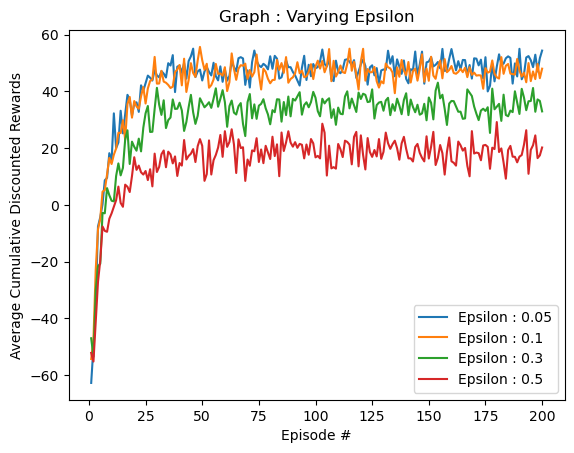

<Figure size 640x480 with 0 Axes>

: 

In [ ]:
fig = plt.figure()
plt.title("Graph : Varying Epsilon")
plt.xlabel("Episode #")
plt.ylabel("Average Cumulative Discounted Rewards")
[Q,policy] = rlProblem.qLearning(s0=0,initialQ=np.zeros([mdp.nActions,mdp.nStates]),nEpisodes=200,nSteps=100,epsilon=0.05,temperature=0)
print("Epsilon : 0.05")
print("Q : " + str(Q))
print("Policy : " + str(policy))
print("\n")
[Q,policy] = rlProblem.qLearning(s0=0,initialQ=np.zeros([mdp.nActions,mdp.nStates]),nEpisodes=200,nSteps=100,epsilon=0.1,temperature=0)
print("Epsilon : 0.1")
print("Q : " + str(Q))
print("Policy : " + str(policy))
print("\n")
[Q,policy] = rlProblem.qLearning(s0=0,initialQ=np.zeros([mdp.nActions,mdp.nStates]),nEpisodes=200,nSteps=100,epsilon=0.3,temperature=0)
print("Epsilon : 0.3")
print("Q : " + str(Q))
print("Policy : " + str(policy))
print("\n")
[Q,policy] = rlProblem.qLearning(s0=0,initialQ=np.zeros([mdp.nActions,mdp.nStates]),nEpisodes=200,nSteps=100,epsilon=0.5,temperature=0)
print("Epsilon : 0.5")
print("Q : " + str(Q))
print("Policy : " + str(policy))
print("\n")
plt.legend(loc='best')
plt.savefig('TestRL_Graph1.png', bbox_inches='tight')
plt.show()
plt.close()


# Discussion
從圖中可看出，當epsilon低時，RL的學習速度快，且最終獎勵值也較高。因為agent一旦發現有效路徑，就會頻繁運用，因此可穩定取得高獎勵。當epsilon變高時，模型會花費大量時間進行隨機探索，導致最終穩定的獎勵值較低。由此可知，過高的探索率可能會對模型產生不良引響，造成學習成果不佳。